# Data Preparation

In [1]:
import re
import string

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd

from gensim.models import KeyedVectors
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

RANDOM_SEED = 19730115
rng = np.random.RandomState(RANDOM_SEED)


print("Required packages installed.")

Required packages installed.


[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def load_dataset(path, stratify=False):
    """Get the data from csv file

    Args:
        path(str): the file complete path. 

    Returns:
        A pandas dataframe.
    """
    dataset = pd.read_csv(path)

    if stratify:
        dataset = dataset.groupby('polarity', group_keys=False).apply(
            lambda x: x.sample(frac=0.4))
        dataset.reset_index(drop=True, inplace=True)

    return dataset


In [4]:
# Load the reviews datasets.
reviews_train_dataset = load_dataset("../data/processed/buscape_reviews_train_dataset.csv", True)
reviews_test_dataset  = load_dataset("../data/processed/buscape_reviews_test_dataset.csv", True)

<AxesSubplot:title={'center':'Polarity Distribution in Train'}>

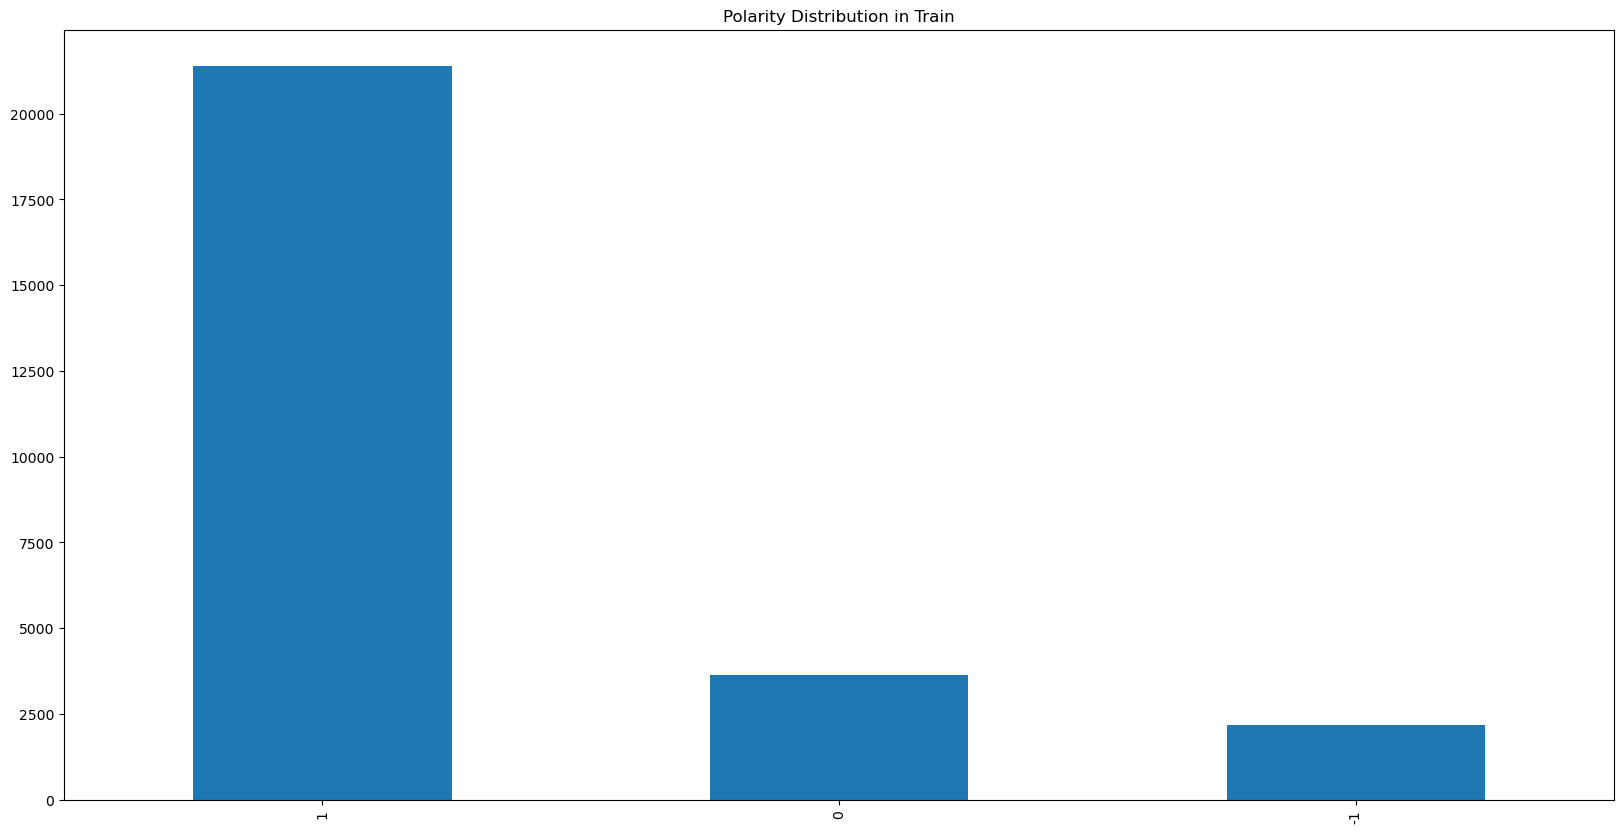

In [5]:
plt.figure(figsize=(20, 10))
plt.title('Polarity Distribution in Train')
reviews_train_dataset['polarity'].value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'Polarity Distribution in Test'}>

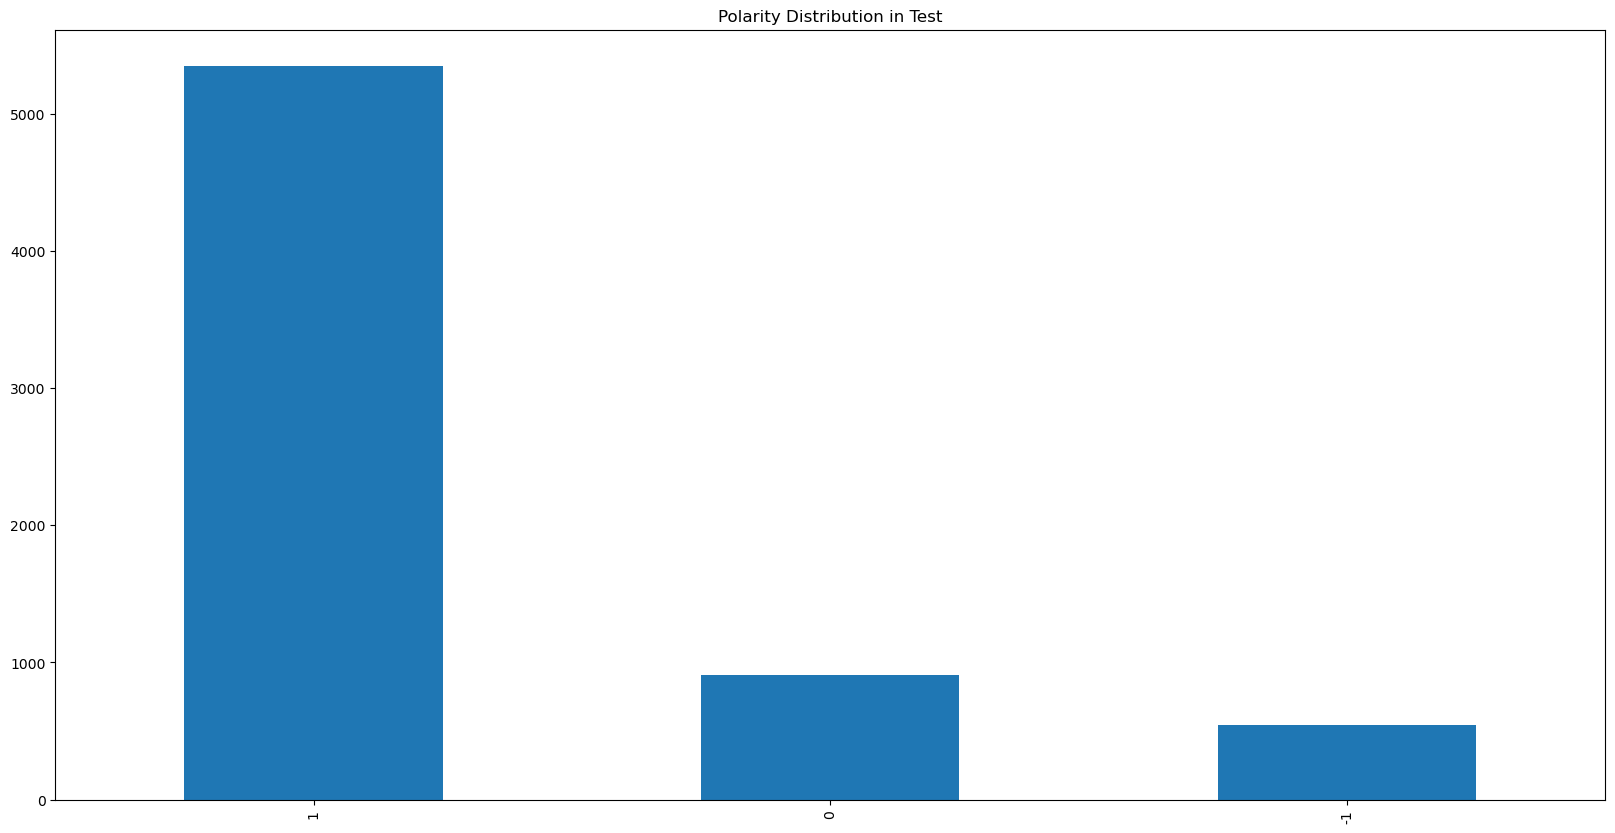

In [6]:
plt.figure(figsize=(20, 10))
plt.title('Polarity Distribution in Test')
reviews_test_dataset['polarity'].value_counts().plot(kind='bar')

### Counter Vectorizer

In [7]:
cv = CountVectorizer(stop_words=stopwords, max_features=100)
reviews_train_cv  = cv.fit_transform(reviews_train_dataset['review_text'])
reviews_train_dtm_cv = pd.DataFrame(reviews_train_cv.toarray(), columns=cv.get_feature_names_out())
reviews_train_dtm_cv.index = reviews_train_dataset.index
reviews_train_processed_cv = pd.concat([reviews_train_dataset[['original_index']], reviews_train_dtm_cv, reviews_train_dataset[['polarity']]], axis=1)
print(f"The counter vectorizer train matrix has {reviews_train_processed_cv.shape[0]} rows and {reviews_train_processed_cv.shape[1]} columns")

reviews_test_cv  = cv.transform(reviews_test_dataset['review_text'])
reviews_test_dtm_cv = pd.DataFrame(reviews_test_cv.toarray(), columns=cv.get_feature_names_out())
reviews_test_dtm_cv.index = reviews_test_dataset.index
reviews_test_processed_cv = pd.concat([reviews_test_dataset[['original_index']], reviews_test_dtm_cv, reviews_test_dataset[['polarity']]], axis=1)
print(f"The counter vectorizer test matrix has {reviews_test_processed_cv.shape[0]} rows and {reviews_test_processed_cv.shape[1]} columns")


The counter vectorizer train matrix has 27196 rows and 102 columns
The counter vectorizer test matrix has 6799 rows and 102 columns


In [8]:
reviews_train_processed_cv.head(5)

,original_index,achei,acho,agora,ainda,além,aparelho,apenas,baixo,bastante,...,todos,tudo,tv,usar,uso,vale,valor,ótima,ótimo,polarity
0,2_314762,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,-1
1,0_175504,0,0,0,0,0,0,1,0,0,...,0,0,9,0,2,0,0,0,0,-1
2,6_211849,0,0,0,0,0,0,0,0,0,...,1,0,0,2,0,0,0,0,0,-1
3,0_340230,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
4,0_372389,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,-1


In [9]:
reviews_test_processed_cv.head(5)

,original_index,achei,acho,agora,ainda,além,aparelho,apenas,baixo,bastante,...,todos,tudo,tv,usar,uso,vale,valor,ótima,ótimo,polarity
0,0_376641,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-1
1,0_279852,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
2,0_420127,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
3,8_328421,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,-1
4,54_42959,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1


In [10]:
reviews_train_processed_cv.to_pickle('../data/processed/buscape_reviews_train_dataset_cv.pkl')
reviews_test_processed_cv.to_pickle('../data/processed/buscape_reviews_test_dataset_cv.pkl')

### TF-IDF Vectorizer

In [11]:

tv = TfidfVectorizer(stop_words=stopwords, max_features=100)
reviews_train_tv  = tv.fit_transform(reviews_train_dataset['review_text'])
reviews_train_dtm_tv = pd.DataFrame(reviews_train_tv.toarray(), columns=tv.get_feature_names_out())
reviews_train_dtm_tv.index = reviews_train_dataset.index
reviews_train_processed_tv = pd.concat([reviews_train_dataset[['original_index']], reviews_train_dtm_tv, reviews_train_dataset[['polarity']]], axis=1)
print(f"The tf-idf vectorizer train matrix has {reviews_train_processed_tv.shape[0]} rows and {reviews_train_processed_tv.shape[1]} columns")

reviews_test_tv  = tv.transform(reviews_test_dataset['review_text'])
reviews_test_dtm_tv = pd.DataFrame(reviews_test_tv.toarray(), columns=tv.get_feature_names_out())
reviews_test_dtm_tv.index = reviews_test_dataset.index
reviews_test_processed_tv = pd.concat([reviews_test_dataset[['original_index']], reviews_test_dtm_tv, reviews_test_dataset[['polarity']]], axis=1)
print(f"The tf-idf vectorizer test matrix has {reviews_test_processed_tv.shape[0]} rows and {reviews_test_processed_tv.shape[1]} columns")

The tf-idf vectorizer train matrix has 27196 rows and 102 columns
The tf-idf vectorizer test matrix has 6799 rows and 102 columns


In [12]:
reviews_train_processed_tv.head(5)

,original_index,achei,acho,agora,ainda,além,aparelho,apenas,baixo,bastante,...,todos,tudo,tv,usar,uso,vale,valor,ótima,ótimo,polarity
0,2_314762,0.198884,0.0,0.195264,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.167530,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,-1
1,0_175504,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.111601,0.0,0.0,...,0.000000,0.0,0.811899,0.000000,0.181148,0.0,0.0,0.0,0.0,-1
2,6_211849,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.319169,0.0,0.000000,0.654787,0.000000,0.0,0.0,0.0,0.0,-1
3,0_340230,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,-1
4,0_372389,0.238585,0.0,0.000000,0.0,0.224943,0.0,0.000000,0.0,0.0,...,0.200971,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,-1


In [13]:
reviews_train_processed_tv.to_pickle('../data/processed/buscape_reviews_train_dataset_tv.pkl')
reviews_test_processed_tv.to_pickle('../data/processed/buscape_reviews_test_dataset_tv.pkl')

### Glove Vectorizer

In [14]:
# Load the pre-trainned glove embedding.
glove = KeyedVectors.load_word2vec_format('../data/embeedings/glove_s50.txt')

In [15]:

def text_to_glove(text, model, vectorizer=None, vocab=None, size=50):
    if not vectorizer:
        raise Exception("The vectorizer parameter must not be None")

    transformed = vectorizer.transform(text)
    vectorized  = pd.DataFrame(transformed.toarray(), columns=vectorizer.get_feature_names_out())

    embeedings = pd.DataFrame()
    for i in range(vectorized.shape[0]):
        sentence = np.zeros(size)
        for word in vocab[vectorized.iloc[i, :] > 0]:
            if model.get_index(word, default=-1) != -1:
                sentence = sentence + model.get_vector(word)
            else:
                print("Out of Vocabulary")

        embeedings = pd.concat([embeedings, pd.DataFrame([sentence])])

    return embeedings

In [17]:
reviews_train_dtm_gv = text_to_glove(reviews_train_dataset['review_text'], glove, tv, reviews_train_processed_cv.columns[1:-1], 50)
reviews_train_processed_gv = pd.concat([reviews_train_dataset.reset_index()[['original_index']], reviews_train_dtm_gv.reset_index(), reviews_train_dataset.reset_index()[['polarity']]], axis=1, ignore_index=True)
print(f"The glove vectorizer train dataframe has {reviews_train_processed_gv.shape[0]} rows and {reviews_train_processed_gv.shape[1]} columns")

The glove vectorizer train dataframe has 27196 rows and 53 columns


In [19]:
reviews_train_processed_gv.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,2_314762,0,-2.511985,-3.204513,-7.348852,-48.886257,-2.973008,1.319243,-2.791972,-3.850332,...,-3.772044,-0.948056,-2.158541,5.461779,7.093572,5.022255,1.536625,6.465830,-9.496051,-1
1,0_175504,0,-0.358357,-0.296542,-2.121435,-29.202175,-1.051647,1.690819,-3.013284,-1.297156,...,-1.710692,-0.057014,-0.608029,3.760659,4.625065,-0.061643,-5.305584,4.188515,-3.624496,-1
2,6_211849,0,-1.623052,-0.753864,-3.227133,-20.642323,-0.527938,-1.286221,1.171325,-2.102995,...,-0.925314,0.202510,-0.486125,0.627003,4.097218,1.841638,-2.048301,2.505987,-5.315422,-1
3,0_340230,0,0.841265,-2.532155,-1.631722,-10.207914,-1.173525,1.708822,1.495773,2.566378,...,-0.678971,2.041726,0.951423,1.210063,3.290852,-0.292919,-6.221179,-2.756810,-1.291581,-1
4,0_372389,0,-1.526674,-2.069315,-5.848722,-28.399672,-2.736374,2.223817,-0.098084,1.396948,...,-1.796030,0.069439,0.492161,1.895316,5.232236,0.940353,-5.802378,-1.287034,-4.613459,-1


In [18]:
reviews_test_dtm_gv = text_to_glove(reviews_test_dataset['review_text'], glove, tv, reviews_test_processed_cv.columns[1:-1], 50)
reviews_test_processed_gv = pd.concat([reviews_test_dataset.reset_index()[['original_index']], reviews_test_dtm_gv.reset_index(), reviews_test_dataset.reset_index()[['polarity']]], axis=1, ignore_index=True)
print(f"The glove vectorizer train dataframe has {reviews_test_processed_gv.shape[0]} rows and {reviews_test_processed_gv.shape[1]} columns")

The glove vectorizer train dataframe has 6799 rows and 53 columns


In [20]:
reviews_test_processed_gv.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0_376641,0,0.693532,-2.640616,-2.129412,-8.276909,-0.449784,2.485941,2.128485,2.316333,...,-1.639689,1.755613,-1.297074,2.343310,1.436439,0.293369,-4.472167,-3.116297,-1.994203,-1
1,0_279852,0,-2.535228,-1.060530,-3.009994,-21.450437,-0.414904,1.056175,2.411848,1.490311,...,-1.550528,1.363945,-1.992328,1.488792,0.822544,1.903162,-2.789635,-0.681955,-1.913146,-1
2,0_420127,0,-2.041973,-2.077612,-5.078635,-22.205121,-0.794443,0.771059,0.176381,0.244131,...,-2.438289,1.138374,1.208901,3.087660,-0.998716,2.899146,-4.661086,-2.916495,-0.943722,-1
3,8_328421,0,-1.093924,-0.656474,-4.226817,-20.675474,-1.158130,-0.278560,-0.956229,0.284933,...,-2.069124,-0.281140,-0.027912,2.449556,4.290412,2.249881,-2.350668,-0.580760,-4.702118,-1
4,54_42959,0,-0.893629,-0.050825,-2.114867,-10.027117,1.335585,1.186153,0.329473,2.197194,...,0.444925,2.607822,-0.658121,0.419322,-0.000536,0.437941,-3.787465,-0.397434,-0.932617,-1


In [21]:
reviews_train_processed_gv.to_pickle('../data/processed/buscape_reviews_train_dataset_gv.pkl')
reviews_test_processed_gv.to_pickle('../data/processed/buscape_reviews_test_dataset_gv.pkl')